# Construcción del circuito de corrección de erorres:
## Circuito de 5 qubits

En teoría de la información cuántica, el límite cuántico de Singelton establece que:

$$n - k \geq 2(d-1) $$

para un código de Hamming [n,k,d], es decir, un código que utiliza n qubits para codificar k qubits y es capaz de corregir errores en hasta d-1 qubits.

En otras palabras, para que un código sea capaz de corregir errores en hasta t qubits debe tener una distancia de, al menos, 2t+1. Por tanto, otra manera de expresar el límite cuántico de Singelton es: 

$$n-k \geq 4t $$

De forma que el código más pequeño que podemos construir para la corrección de errores tipo inversión de amplitud y variación de fase en un único qubit es: 

$$n - 1 \geq 4  \rightarrow n \geq 5 \rightarrow \boxed{n=5}$$

La forma de dicho circui

**Construcción de los registros**

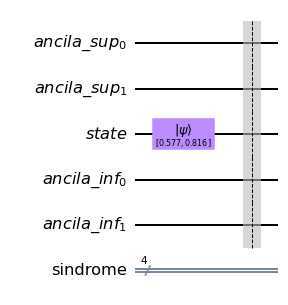

In [199]:
import numpy as np
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister
from qiskit.quantum_info import *

# Creamos los registros del circuito de corrección de errores

qreg_state = QuantumRegister(1,'state')
qreg_sup = QuantumRegister(2,'ancila_sup')
qreg_inf = QuantumRegister(2,'ancila_inf')
creg= ClassicalRegister(4,'sindrome')

# Creamos el circuito cuántico para la codificación y decodificación

circ = QuantumCircuit(qreg_sup,qreg_state,qreg_inf,creg)

circ_state = QuantumCircuit(qreg_sup,qreg_state,qreg_inf,creg)

state = [1/np.sqrt(3), np.sqrt(2/3)]
#state = random_statevector(2)

# Inicializamos el circuito

circ_state.initialize(state, 2)

circ_state.barrier()

circ_state.draw()

**Consrucción del circuito de 5 qubits**

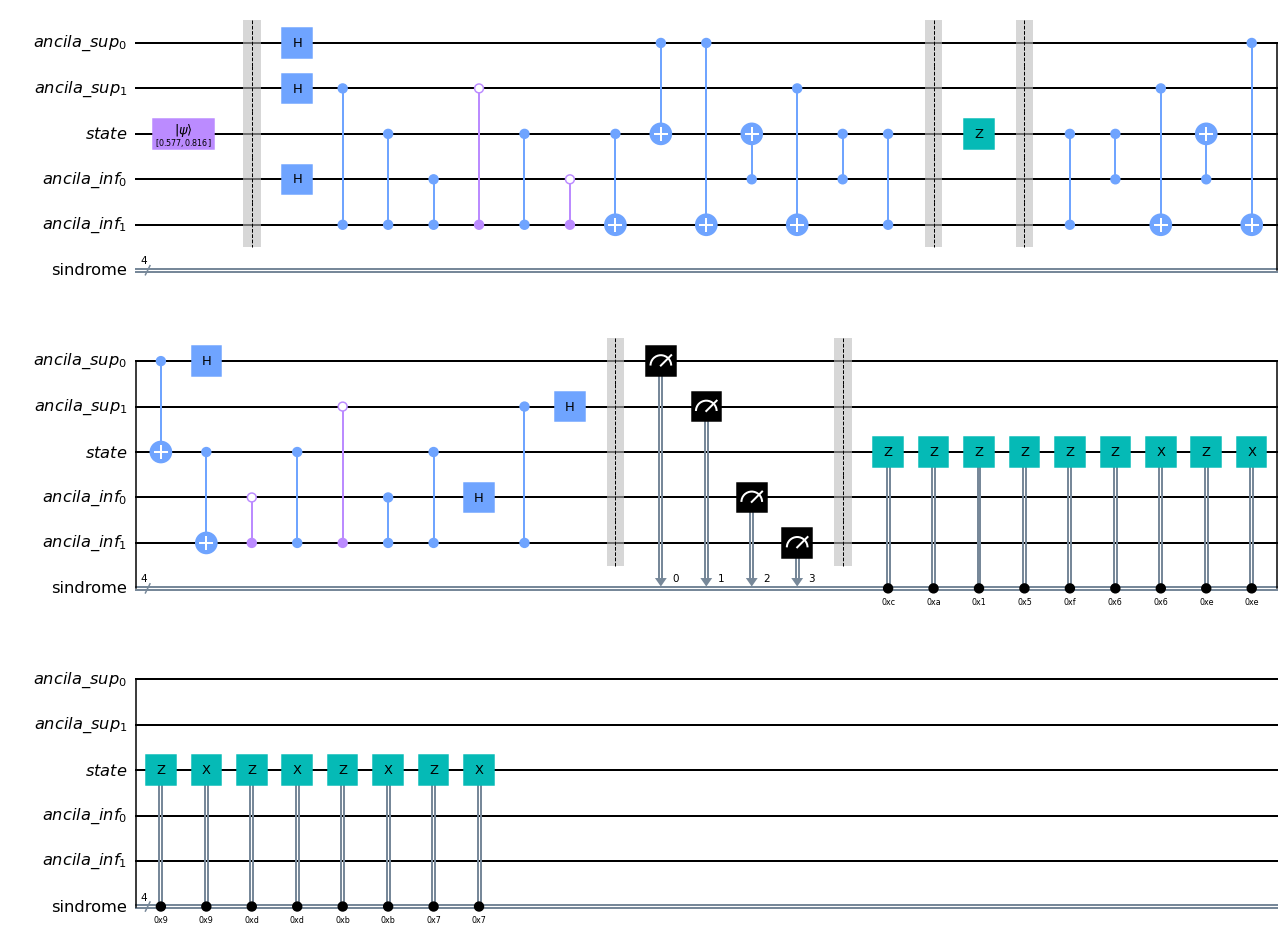

In [200]:
from qiskit.circuit.library.standard_gates.z import ZGate


# Procedemos con la construcción del circuito cuántico asociado: 

circ.h(0)
circ.h(1)
circ.h(3)


circ.cz(1,4)
circ.cz(2,4)
circ.cz(3,4)

circ.cz(1,4, ctrl_state=0)
circ.cz(2,4)
circ.cz(3,4, ctrl_state=0)


circ.cx(2,4)
circ.cx(0,2)
circ.cx(0,4)
circ.cx(3,2)
circ.cx(1,4)

circ.cz(2,3)
circ.cz(2,4)


# Introducimos el error
qreg_error = QuantumRegister(5)
circ_error = QuantumCircuit(qreg_error)
circ_error.barrier()

#circ_error.x(2)
circ_error.z(2)

#Fin del error
circ_error.barrier()

circ_con_state = circ_state.compose(circ)

circ_con_error = circ_con_state.compose(circ_error)

circ_inverse = circ.inverse()
circ = circ_con_error.compose(circ_inverse)

circ.barrier()

state_con_error = Statevector.from_instruction(circ)

circ.measure([0,1,3,4],[0,1,2,3])

circ.barrier()

circ.z(qreg_state[0]).c_if(creg,12)
circ.z(qreg_state[0]).c_if(creg,10)
circ.z(qreg_state[0]).c_if(creg,1)
circ.z(qreg_state[0]).c_if(creg,5)
circ.z(qreg_state[0]).c_if(creg,15)
circ.z(qreg_state[0]).c_if(creg,6)
circ.x(qreg_state[0]).c_if(creg,6)
circ.z(qreg_state[0]).c_if(creg,14)
circ.x(qreg_state[0]).c_if(creg,14)
circ.z(qreg_state[0]).c_if(creg,9)
circ.x(qreg_state[0]).c_if(creg,9)
circ.z(qreg_state[0]).c_if(creg,13)
circ.x(qreg_state[0]).c_if(creg,13)
circ.z(qreg_state[0]).c_if(creg,11)
circ.x(qreg_state[0]).c_if(creg,11)
circ.z(qreg_state[0]).c_if(creg,7)
circ.x(qreg_state[0]).c_if(creg,7)


circ.draw()

**Obtención del síndrome y correción del estado**

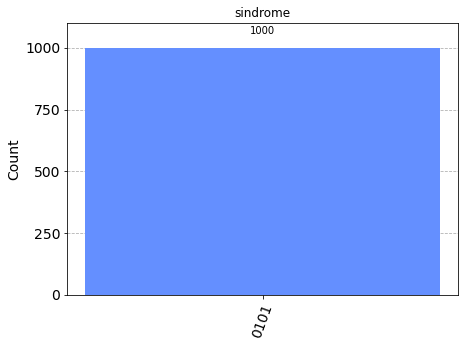

In [201]:
from qiskit import Aer, execute
from qiskit.providers.aer import QasmSimulator, StatevectorSimulator
from qiskit_textbook.tools import array_to_latex
from qiskit.visualization import *
import warnings
warnings.filterwarnings("ignore")

backend = Aer.get_backend('statevector_simulator')
job = execute(circ,backend ,shots = 1000)
resultado = job.result()

counts = resultado.get_counts(circ)
plot_histogram(counts, title = 'sindrome')

In [202]:
psi_error=list(filter(lambda x: x != 0, state_con_error))
resultado_sv = job.result().get_statevector()
resultado_psi=list(filter(lambda x: x != 0, resultado_sv))
psi_error=list(filter(lambda x: x != 0, state_con_error))
display(array_to_latex(state, prefix= 'Estado \; original \; |\\Psi \\rangle='))
display(array_to_latex(psi_error, prefix= 'Estado \; con \; error \; |\\Psi \\rangle='))
display(array_to_latex(resultado_psi, prefix = 'Estado \; corregido \; |\\Psi \\rangle='))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>